# **Modelación de sistemas dinámicos**
# Separación de variables

### M. en C. Jonathan A. Urrutia Anguiano
### MA1035.535


<div hidden>
$\def\dd{\text{d}}$
$\def\dv#1#2{\dfrac{\text{d} #1}{\text{d}#2}}$
$\def\mdv#1#2#3{\dfrac{\text{d}^{#3} #1}{\text{d}#2^{#3}}}$
$\def\vb#1{\mathbf{#1}}$
$\def\pdv#1#2#3{\dfrac{\partial^{#3} #1}{\partial #2^{#3}}}$
\vskip-\parskip
\vskip-\baselineskip
</div>

## Ecuaciones diferenciales ordinarias de primer orden separables

Una ***ordinary differential equation*** (ODE) de primer orden en su forma explícita se escribe como

$$
\begin{aligned}
\dv{y(t)}{t} = f(y,t),
\end{aligned}
$$

donde $f$ es función de nuestra variable a determinar $y(t)$ con $t$ su variable dependiente. Un caso en el que esta ecuación es soluble de forma *analítica*, es cuando $f(y,t)$ se puede expresar como sigue:

$$
\begin{aligned}
\dv{y(t)}{t} = f(y,t) = g(y)h(t),
\end{aligned}
$$

es decir, como el producto de una función $g$ que depende únicamente de la variable independiente $y$ y una función $h$ que depende únicamente de la variable dependiente $t$.

### Resolviendo una ODE separable

Suponiende una ODE de primer orden separable, es decir
$$
\begin{aligned}
\dv{y(t)}{t} = f(y,t) = g(y)h(t),
\end{aligned}
$$

donde $g(y)\neq 0$ y $(t)\neq 0$, es posible despejar toda la dependencia en $y$ de un lado de la ecuación y realziar una integración respecto a $t$:

$$
\begin{aligned}
\int\frac{1}{g(y)}\dv{y(t)}{t}\dd{t} = \int\frac{\dd{y}}{g(y)} = \int h(t)\dd{t} + C,
\end{aligned}
$$

donde se realizó e}un cambio de variable. Notemos que, entonces, lo que resta es únicamente un problema de integración y despeje algebráico.

Notemos que una **ODE autónoma** es una **ODE separable** donde $h(t) = 1$.

### Ejemplo: Ley de enfriamiento de Newton

Anteriormente se estudió la ley de enfriamiento de Newton, donde se propone que la temperatura $T=T(t)$ obedece la siguiente ODE:

$$
\begin{aligned}
\dv{T}{t} &= - \alpha (T-T_a),  &\text{con $T(t) = T_a$ como solución de equilibrio.}
\end{aligned}
$$
con $\alpha>0$ es una constante que modula la taza de enfriamiento y dependerá del objeto o material en cuestión.

Ésta es una ODE autónoma y, por tanto, separable, cuya solución es

$$
T(t) = T_a + (T_0 - T_a)  \exp\Big[- \alpha  (x - t_0)\Big].
$$

¿Cómo se llega a esta expresión?

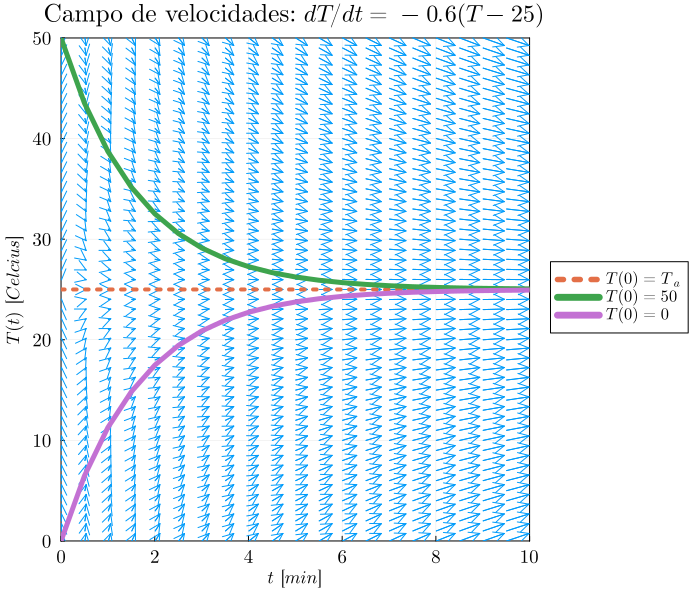

In [1]:
using Plots, LaTeXStrings
meshgrid(x, y) = (repeat(x, outer=length(y)), repeat(y, inner=length(x))) # helper function to create a quiver grid.

scale = .05
alpha = .6
T_a = 25

function Newton_Law_dv(y,x) #dT/dt = - alpha (T-T_a)
    return - alpha * (y - T_a)
end

# Tamaños determinados para la gráfica
default(
    titlefontsize = 16,
    legendfontsize = 11,
    guidefontsize = 12,
    tickfontsize = 12,
    size = (700, 600),
    xlim = (0,10),
    ylim = (0,50))

# Etiquetas de ejes y gráficas
P = plot(fontfamily = "Computer Modern", framestyle=:box, lw =8, legend=:outerright) # Especificamos la tipografía, el "frame" y grosor de línea
title!(L"Campo de velocidades: ${d}T/{d}t = - 0.6 (T - 25)$")
xlabel!(L"$t \;\;[min]$")
ylabel!(L"$T(t)\;\;[Celcius]$")

time = 0.01:.5:10
temp = 0:50
time, temp = meshgrid(time, temp)
u = @. time * scale
v = @. Newton_Law_dv(temp,time) * scale
quiver!(time, temp, quiver=(u, v), arrowscale=.1, headsize=.1)
plot!([0,20],[T_a,T_a],lw = 4, label = L"$T(0) = T_a$", ls=:dot)  # Graficamos solución de equilibio y=1


function Newton_Law(x) #dT/dt = - alpha (T-T_a)
    return T_a + (T_0 - T_a) * exp(- alpha * (x - t_0))
end

time_an = 0:.5:20

t_0, T_0 = 0, 50
sol_an = @. Newton_Law(time_an)
plot!(time_an,sol_an, lw = 5, label = L"$T(0) = 50$") #Graficamos para cada solución

t_0, T_0 = 0, 0
sol_an = @. Newton_Law(time_an)
plot!(time_an,sol_an, lw = 5,label = L"$T(0) = 0$") #Graficamos para cada solución
display(P)

P = plot();


### Ejemplo: Otra ecuación autónoma

$$
\begin{aligned}
\dv{y(t)}{t} =& 1  - y^2(t), &\text{con $y(t) = \pm 1$ como solución de equilibrio.}
\end{aligned}
$$

Si condiciones iniciales *cercanas* a la solución de equilibrio convergen a ésta, la solución es **estable** y en caso de converger a otras soluciones entonces tenemos soluciones **inestables**

En este caso es posible obtener tres soluciones (donde una es equivalente a las dos anteriores):

$$
\begin{array}{ll}
y(t) = \tanh[t- t_0 + \text{atanh}(y_0)], &  |y|<1,\\
y(t) = \sqrt{1-(1-y_0^2)\exp[-2(t-t_0)]}, &  y > 1\\
y(t) = -\sqrt{1-(1-y_0^2)\exp[2(t-t_0)]}, &  y < 1,
\end{array}
$$

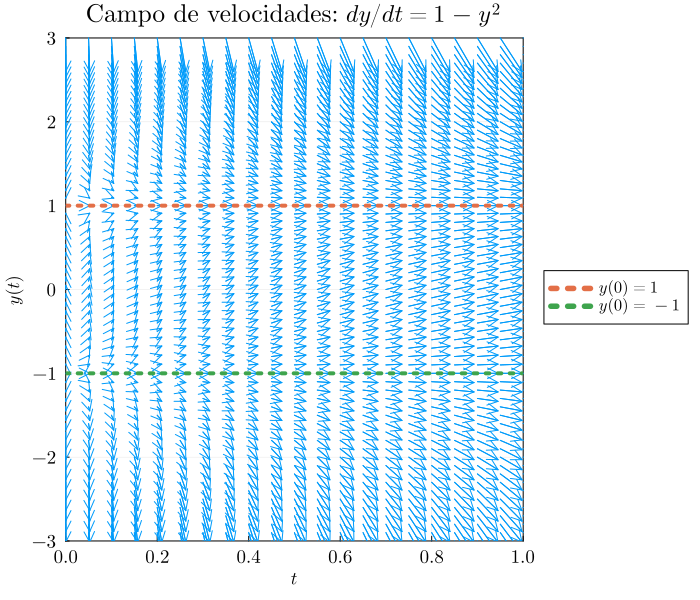

In [33]:
scale = .05

function auto_dv(y,x) #dy/dt = 1-y^2  = f(y,x)
    return 1 - y*y
end

# Tamaños determinados para la gráfica
default(
    titlefontsize = 16,
    legendfontsize = 11,
    guidefontsize = 12,
    tickfontsize = 12,
    size = (700, 600),
    xlim = (0,1),
    ylim = (-3,3))

# Etiquetas de ejes y gráficas
P = plot(fontfamily = "Computer Modern", framestyle=:box, lw =8, legend=:outerright) # Especificamos la tipografía, el "frame" y grosor de línea
title!(L"Campo de velocidades: ${d}y/{d}t = 1 - y^2$")
xlabel!(L"$t$")
ylabel!(L"$y(t)$")

time = 0:.05:1
temp = -3:.1:3
time, temp = meshgrid(time, temp)
u = @. time * scale
v = @. auto_dv(temp,time) * scale
quiver!(time, temp, quiver=(u, v), arrowscale=.1, headsize=.1)
plot!([0,1],[1,1],lw = 4, label = L"$y(0) = 1$", ls=:dot)  # Graficamos solución de equilibio y=1
plot!([0,1],-[1,1],lw = 4, label = L"$y(0) = -1$", ls=:dot) # Graficamos solución de equilibio y = -1
display(P)


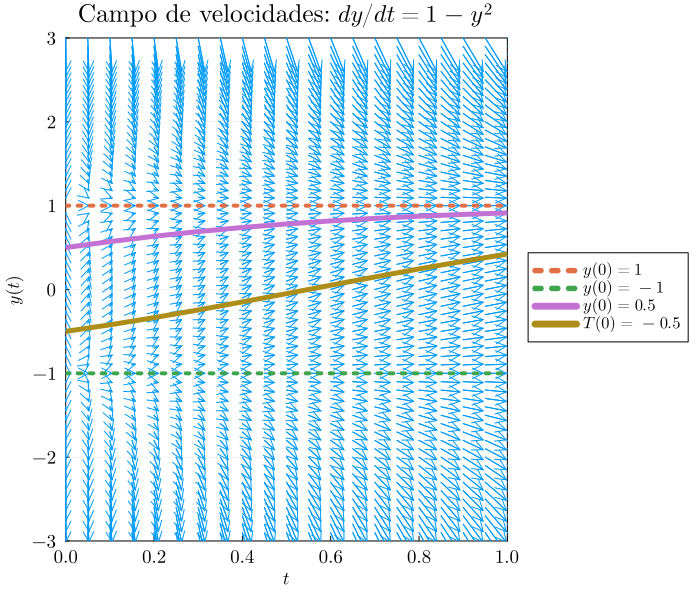

In [30]:
function auto(x) #dT/dt = - alpha (T-T_a)
    return tanh(x - t_0 + atanh(T_0))
end

time_an = 0:.1:1

t_0, T_0 = 0, .5
sol_an = @. auto(time_an)
plot!(time_an,sol_an, lw = 5, label = L"$y(0) = 0.5$") #Graficamos para cada solución

t_0, T_0 = 0, -.5
sol_an = @. auto(time_an)
plot!(time_an,sol_an, lw = 5,label = L"$y(0) = -0.5$") #Graficamos para cada solución
display(P)



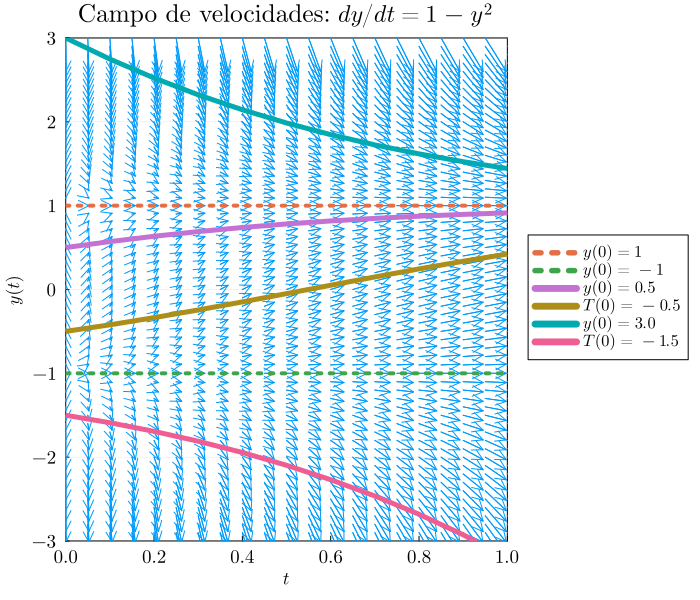

In [31]:
function auto2(x) #dT/dt = - alpha (T-T_a)
    return sqrt(1-(1-T_0^2) * exp( - 2 * (x-t_0) ) )
end

function auto3(x) #dT/dt = - alpha (T-T_a)
    return -sqrt(1-(1-T_0^2) * exp( 2 * (x-t_0) ) )
end

time_an = 0:.1:1

t_0, T_0 = 0, 3
sol_an = @. auto2(time_an)
plot!(time_an,sol_an, lw = 5, label = L"$y(0) = 3.0$") #Graficamos para cada solución

t_0, T_0 = 0, -1.5
sol_an = @. auto3(time_an)
plot!(time_an,sol_an, lw = 5,label = L"$y(0) = -1.5$") #Graficamos para cada solución
display(P)

### Ejemplo: Fuerza de arrastre según la Ley de Stokes

Mediante la segunda ley de Newton, es posible determinar la posición de una partícula puntual ante el efecto de diversas fuerzas aplicadas sobre de esta. Un caso solución analítica es cuando esta partícula se encuentra en caida libre, es decir, la única fuerza que actúa sobre de ella es la de la fuerza de gravedad. Este caso se modela como

$$
\begin{aligned}
m\mdv{y}{t}{2} = - mg
\end{aligned}
$$
donde $m$ es la masa de la partícula y $g$ la aceleración debido a la gravedad. Para considerar los efectos del aire, es razonable suponer, para objetos *ligeros*, que la fuerza de arrastre $\vec{F}_\text{drag}$ es $\vec{F}_\text{drag} = -m\gamma\vec{v}$, por lo que la ecuación diferencial a resolver es:
$$
\begin{aligned}
m\dv{v_y}{t} = - mg - m\gamma v_y,
\end{aligned}
$$
donde $\gamma>0$ es un coeficiente realacionado con la densidad de masa de la partícula, su sección transversal y la vsicosidad del medio en el que viaja. Muestre que la velocidad es:

$$
v_y(t) = -\frac{g}{\gamma} + \left(v_0 + \frac{g}{\gamma} \right) \exp[-\gamma(t-t_0)]
$$


Para objetos más *pesados*, se propone $\vec{F}_\text{drag} = -m\gamma ||\vec{v}|| \vec{v}$, por lo que la ecuación diferencial es

$$
\begin{aligned}
-m\dv{v_y}{t} = - mg + m\gamma v_y^2
\end{aligned}
$$

Notemos que a diferencia del caso anterior, se escribe explícitamente el signo pues esa información se pierde al plantaar la ecuación diferencial en términos de la norma al cuadrado de la velocidad. Muestre que

$$
v_y(t) = \sqrt{\frac{g}{\gamma}}\tanh\left[\sqrt{\frac{g}{\gamma}}(t-t_0) + \text{atanh}\left(v_0\sqrt{\frac{\gamma}{g}}\right)\right]
$$

## Ejercicio en clase:

Las siguientes ODE describen el comportamiento de dos poblaciones $P$ bajo distintas condiciones:

$$
\begin{align}
\dv{P}{t} =& k P,  \tag{1}\\
\dv{P}{t} =& k \left(1 - \frac{P}{N}\right)P \tag{2}
\end{align}
$$

con $k$, $N$, $T > 0 $. La primera ecuación se conoce como (de)crecimiento exponencial mientras que la otra se conce como crecimiento logístico. **Resuelve las ecuaciones diferenciales**.

Para prfundizar en el tema, es recomendable leer más sobre la [ecuación logística](https://openstax.org/books/calculus-volume-2/pages/4-4-the-logistic-equation), en particular hablar de su modificación a la siguiente expresión

$$\dv{P}{t} = k \left(1 - \frac{P}{N}\right)\left(1 - \frac{P}{T}\right)P$$

*Hint*: Recuerda el métod de las fracciones parciales.